In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os
import numpy as np

import matplotlib as mpl

mpl.rcParams.update({"figure.facecolor": "white"})

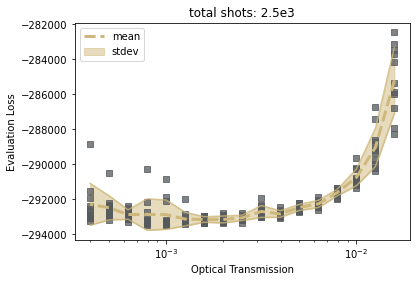

In [60]:
load_dir = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\evaluation_loss\low_flux_noise_spread\deadtime_nshots_2.5e3'

if load_dir[-21:-13] == 'deadtime':
    color = '#565A5C'
elif load_dir[-20:-13] == 'poisson':
    color = '#A2A4A3'
else:
    print('Check naming for file...')

fig = plt.figure()
ax = fig.add_subplot(111)

files = os.listdir(load_dir)
eval_loss_dtime_spread = []
for i in range(len(files)):
    df_dtime = pd.read_csv(load_dir + r'/' + files[i])
#     df_pois = pd.read_csv(load_dir + r'/eval_loss_dtimeFalse_OD1.5E+00-3.4E+00_order7-21_shots2.50E+05.csv')
    eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
#     eval_loss_pois = df_pois['Evaluation Loss'].dropna()
    percent_active = df_dtime['Average %-age where Detector was Active'].dropna()
    optimal_C = df_dtime['Optimal Scaling Factor'].dropna()

    OD = df_dtime['OD'].dropna()
    transmit_factor = 10**(-OD)
    atten_factor = 1-transmit_factor

    skip_num = 1
    ax.plot(transmit_factor[skip_num:-1], eval_loss_dtime[skip_num:], 's', color=color, alpha=0.75)
#     ax.plot(transmit_factor[skip_num:], eval_loss_pois[skip_num:], '^-', color='orange', markeredgecolor='black', label='Poisson model')
    ax.set_xlabel('Optical Transmission')
    ax.set_ylabel('Evaluation Loss')
    
    eval_loss_dtime_spread.append(eval_loss_dtime)
    
min_eval = np.min(eval_loss_dtime_spread, axis=0)
max_eval = np.max(eval_loss_dtime_spread, axis=0)
mean_eval = np.mean(eval_loss_dtime_spread, axis=0)

stdev_eval = np.std(eval_loss_dtime_spread, axis=0)

# ax.fill_between(transmit_factor[skip_num:-1], min_eval[skip_num:], max_eval[skip_num:], alpha=0.2)
ax.plot(transmit_factor[skip_num:-1], mean_eval[skip_num:], '--', linewidth='3', label='mean', color='#CFB87C')
ax.plot(transmit_factor[skip_num:-1], mean_eval[skip_num:]+stdev_eval[skip_num:], color='#CFB87C', alpha=0.75)
ax.plot(transmit_factor[skip_num:-1], mean_eval[skip_num:]-stdev_eval[skip_num:], color='#CFB87C', alpha=0.75)
ax.fill_between(transmit_factor[skip_num:-1], mean_eval[skip_num:]-stdev_eval[skip_num:], mean_eval[skip_num:]+stdev_eval[skip_num:], color='#CFB87C', alpha=0.5, label='stdev')
ax.set_title('total shots: {}'.format(load_dir[-5:]))
plt.legend()
plt.xscale('log')
plt.show()
    


# df_pois = pd.read_csv(load_dir + r'/eval_loss_dtimeFalse_OD1.5E+00-3.4E+00_order7-21_shots2.50E+05.csv')